# 01. Dimensionality reduction

<div class='alert alert-block alert-info'>

Lesson time: 90 m   
Contributors: Davide Spalla

---
### In this lesson you will learn:
- What dimensionality reduction is and why it is useful in the analysis of neural data
- How to use Principal Component Analysis to obtain a low-dimensional description of the data
- How dimensionality reduction can be used to discover collective modes of activity in the brain
- You will get an overview of the most used non-linear dimensionality reduction methods

</div>


In [7]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
import seaborn as sns
sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False,
                     'image.cmap':plt.cm.jet})

## Introduction
---
 
Data is often high dimensional. In the case of neural data, scientists routinely to make sense of the simultaneous activity of hundreds of recorded neurons.
Working with high dimensional data is difficult : we cannot visualize directly what is going on, and our statistical intuitions easily beak down (see, for example).  
Moreover, often the many dimensions in which the data live are not independent. Neurons have common inputs and talk to each other, neighboring pixels and voxels in imaging data are highly correlated.  
Dimensionality reduction methods yield a low-dimensional description of the data that retains important information, so that we can make sense of it more easily.
Common uses of dimensionality reduction are: 
- visualization: to visualize the data in a 2D or 3D space and get an intuitive feeling of some underlying structure
- compression: to efficiently describe the data without loosing to much information
- Preprocessing: to prepare the data for further analysis
- analysis: to discover and study collective modes of variation in the data


## Principal Component Analysis
---

Principal component analysis is one of the most popular dimensionality reduction algorithms. It performs **linear orthogonal transformation** of the data space that finds the combinations of features that best explain the variability of the data. These combinations, called **principal components**, form a new coordinate system for the data, such that the coordinates are ranked by explained variance.  

Here is a brief overview of how PCA works:  
Let's consider a $N\times P$ data matrix $X$ with $P$ features and $N$ observations (often referred to as "samples" in the data science literature).  
These are $N$ points $x_{i}$ in a  $P$-dimensional space.  

To find the first principal component, the algorithm looks for a $P$-dimensional weight vector $w_{1}$, with unit norm ($|w_{1}=1|$), such that the sum of the projections of the $N$ observed points $x_{i}$ in the direction $w_{1}$ is maximal:

$$ w_{1}=\underset{|w|=1} {argmax}\left[  \sum_{i=1}^{N}(x_{i} \cdot w)^{2} \right] = \underset{|w|=1} {argmax}\left[ w^{T}X^{T}Xw \right] $$

This finds the first principal component $w_{1}$, i.e. the direction of maximal variability in the feature space.  
We can repeat the procedure to find a second direction $w_{2}$, that maximizes variability on the $P-1$ dimensional subspace  $\hat{X}$ orthogonal to $w_{1}$.
We first find $\hat{X}$ by subtracting the first principal component from $X$:

$$ \hat{X}= X -Xw_{1}w_{1}^{T} $$

And then find $w_{2}$ maximizig projections in $\hat{X}$:

$$ w_{2} = \underset{|w|=1} {argmax}\left[ w^{T}\hat{X}^{T}\hat{X}w \right] $$

Repeating the procedure, we can iteratively found an orthonormal basis for the features space, in which dimensions are ranked by how variable the observed data are along them.
This ranking can be used to reduce the dimensionality of the data: we can decide to retain only the first $L$ components ($L<P$), we obtain a $L$ dimensional description of $X$. The PCA procedure guarantees that this representation i the one that captures the most variance of the data, given $L$.

### PCA in action: compressing images

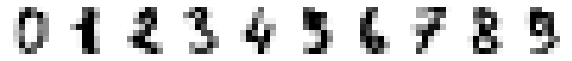

In [4]:
# load image data
dataset = load_digits()
images = dataset.data

#plot first 10 images
plt.figure(figsize=(10,5))
for i,img in enumerate(images[:10]):
    plt.subplot(1,10,i+1)
    plt.imshow(img.reshape(8,8),cmap=plt.cm.Greys)
    plt.axis('off')
    


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(images)

In [47]:
pca = PCA()
pca.fit(X)

PCA()

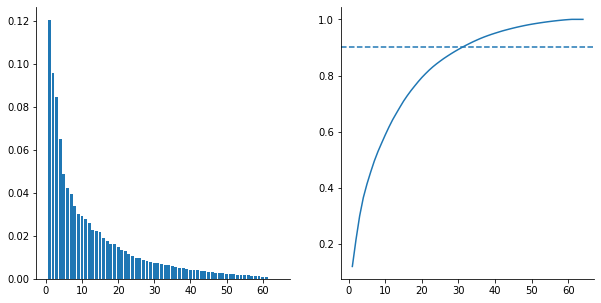

In [58]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(np.arange(1,len(pca.components_)+1),pca.explained_variance_ratio_)
sns.despine()
plt.subplot(1,2,2)
plt.plot(np.arange(1,len(pca.components_)+1),np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.9,linestyle='--')
sns.despine()

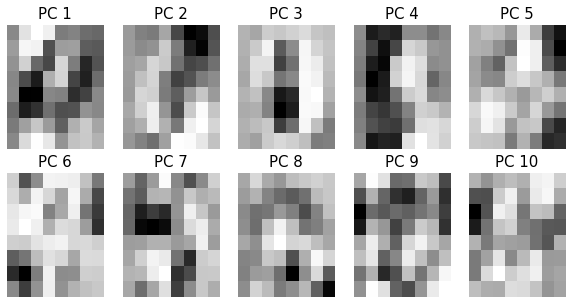

In [85]:
plt.figure(figsize=(10,5))
for i,component in enumerate(pca.components_[:10]):
    plt.subplot(2,5,i+1)
    plt.title(f'PC {i+1}',fontsize=15)
    plt.imshow(component.reshape(8,8),cmap=plt.cm.Greys,aspect='auto')
    plt.axis('off')

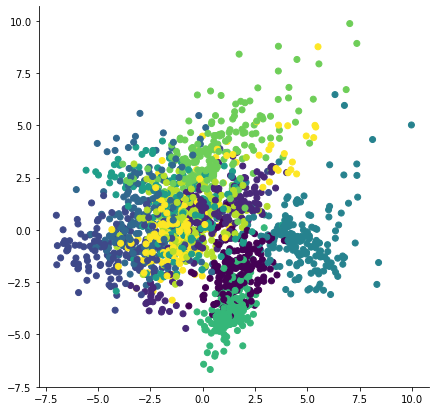

In [75]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
plt.figure(figsize=(7,7))
plt.scatter(X_2d[:,0],X_2d[:,1],c=dataset.target)
sns.despine()

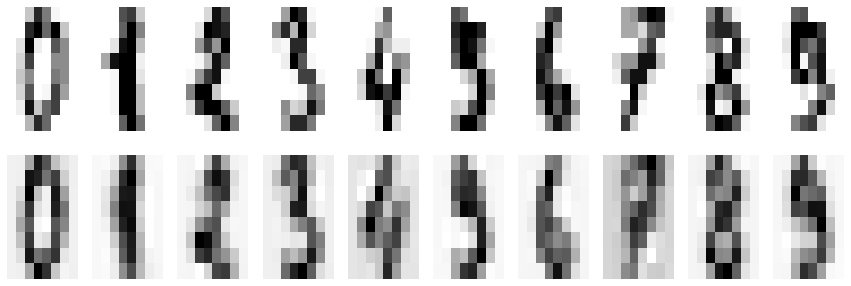

In [84]:
pca = PCA(n_components=20)
X_reduced = pca.fit_transform(X)
X_reconstructed = pca.inverse_transform(X_reduced)

reconstructed_images = scaler.inverse_transform(X_reconstructed)

n_examples = 10 
plt.figure(figsize=(15,5))
for i,(img,r_img) in enumerate(zip(images[:n_examples],reconstructed_images[:n_examples])):
    plt.subplot(2,n_examples,i+1)
    plt.imshow(img.reshape(8,8),cmap=plt.cm.Greys,aspect='auto')
    plt.axis('off')

    plt.subplot(2,10,i+11)
    plt.imshow(r_img.reshape(8,8),cmap=plt.cm.Greys,aspect='auto')
    plt.axis('off')





### Example: discovering collective modes of cortical activity
---
As an example, we will look at how PCA can help us discover collective mode of activity in the mouse cortex.
Here you see a gif of the activity recorded from the dorsal right emisphere of a mouse, using [voltage sensitive dye imaging](https://www.mdpi.com/1422-0067/23/12/6814).


<img src="imgs/cortical_activity.gif" width="600">


As you can see, the activity in each pixel is far from independent.
Can we obtain a low-d description of the data? Let's apply PCA.

In [2]:
# imports 
A = np.load('./data/PCA_example.npy')
# load and descibe data

To apply PCA, we will use the [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) implementation.

In [ ]:
# apply PCA
# plot EVR and cumulative EVR


We see that the first 10 components explain roughly XX% of the variance. What do they look like?
Let's plot the weithts of each PC.

In [ ]:
# plot weights

We see that we can identify some clusters of activity. DESCRIBE  
Is any of these mode associated to the behaviour of the animal?  
This data was recorded while the animal was performing an [auditory trance conditioning task](paper_rafa).  
We have, for example, the time stamp at which the animal licks for reward. 
Does any cortical mode respond to licking? Let's plot the data aligned to licking time.


## Non-linear dimensionality reduction
---

Principal component analysis helps us find the *linear subspace* that maximizes the variance of the data, given a dimension.
This method is powerful, but has its limitations: data can be organized in subspaces that have more complex shapes ad curvatures, that PCA will fail to capture.
Other dimensionality reduction methods can overcome this limitation, by changing the requirements they impose on the embedding subspace. We will see here an overview of some popular methods, each with its own assumptions, strengths and limitations:


### Multidimensional scaling (MDS)

[Multidimensional scaling (MDS)](https://en.wikipedia.org/wiki/Multidimensional_scaling) tries to embed the high dimensional data points in a low-dimensional space of a given dimension $D$, in a way that best preserves the pairwise distances between the points.
MDS computes the computes the embedding coorinates $x_{i} \in \mathbf{R}^{D}$ such that the total distortion of the pairwise differences (usually called [strain]() or stress) is minimized.
The most intuitive version, called metric MDS, minimizes the loss function:

$$Stress_{D} = \sqrt{\sum_{i \neq j=1-N}(d_{ij}-||x_{i}-x_{j}||)^{2}} $$

MDS minimizes the *global* distorsion, it does not take into account neighbouring relationships (for example weighting differently small and large distances)

### t-SNE
[t-distributed stochastic neighbor embedding](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) is a dimensionality reduction methods mostly used to visualize high-dimensional datasets.

First, tSNE computes the probability of the point $i$ having $j$ as his neighbour as:
$$p_{i|j}=\frac{\exp(-||x_{i}-x_{j}||^{2}/2\sigma_{i}^{2})}{\sum_{k \neq i} \exp(-||x_{i}-x_{k}||^{2}/2\sigma_{i}^{2})}$$
Where $x$ are the coordinates in the original high-dimensional space and $\sigma_{i}$ is a length scale parameters, optimized by the algorithm for each datapoint by fixing the entropy of all conditional distributions to be the same (you can think of the algorithm as adapting $\sigma$ to match the local density of the data).

Once these conditional probabilities are computed, pairwise similarities $p_{jj}$ are computed as:
$$p_{ij}=\frac{p_{i|j}+p_{j|i}}{2N}$$
Where $N$ is the number of data points.

Finally, the algorithm computes a set of coordinates $y_{i}$ in a space of given, lower dimensionality (usually 2 or 3 to allow visualization).
These coordinates are set to have similarities $q_{ij}$ given by:
$$q_{ij}=\frac{(1+||y_{i}-y_{j}||^{2})^{-1}}{\sum_{k,l,l \neq k}(1+||y_{i}-y_{j}||^{2})^{-1}}$$
Which is the same procedure as before, but using a Student t-distribution (hence the name of the method) to asses neighbourhood probabilities.

The mapping between the orignial $x_{i}$ and the embedded $y_{i}$ is found minimizing the Kullback-Leibler divergence between the two distributions:

$$KL(P||Q)=\sum_{i \neq j}p_{ij}\log \frac{p_{ij}}{q_{ij}}$$

<div class="alert alert-block alert-warning"> 

### Do not over-interpret tSNE plots
The tSNE algorithm has a tendency to show clusters in data, and the size, number and distribution of these clusters can strongly depend on the specific hyperparameter choice.  
Moreover, tSNE can sometime produce strongly clustered embeddings from non-clustered original data.  
Bb mindful that tSNE (and other dimensionality reduction methods) visualizations can be misleading: always validate any effect by see how it changes with different hyperparameters and, more importantly, with quantitative measure of clustering and similarity.



### Isomap
[Isomap](https://en.wikipedia.org/wiki/Isomap) extends Multidimensional Scaling by incorporating neighbourhood information: they work on the geodesic distances of a weighted graph instead that on all-to-all euclidean distances.

Broadly speaking, the step for Isomap are the following:
- Determine the neighbours of each point (this can be done by fixing a neighbourhood radius $R$, or a number of neighbours $K$)
- Construct a graph by connecting each neighbour pair, with a weight proportional to their euclidean distances
- Compute the distances $d_{ij}$ as the lenght of the shortes path on the graph between $i$ and $j$
- Compute the embeddings by using MDS with the distances $d_{ij}$

Isomap explicitly weighs the *local* information more than MDS, by focusing on the shortest distances and allowing only paths between distant points that pass through other, in between points.
The parameter $R$ or $K$, depending on the implementation, regulate this balance: in the limit in which they are very large, the graph will become fully connected and Isomap will reduce to MDS.



Let's compare what these method give, for the digits images

In [9]:
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap


# load and preprocess data
dataset = load_digits()
images = dataset.data
X = StandardScaler().fit_transform(images)

# initialize embedding calculator
mds = MDS(n_components=2,random_state=0)
tsne = TSNE(n_components=2,random_state=0)
isomap = Isomap(n_components=2)

#fit emebddings and transform data
X_mds = mds.fit_transform(X)
X_tsne = tsne.fit_transform(X)
X_iso = isomap.fit_transform(X)


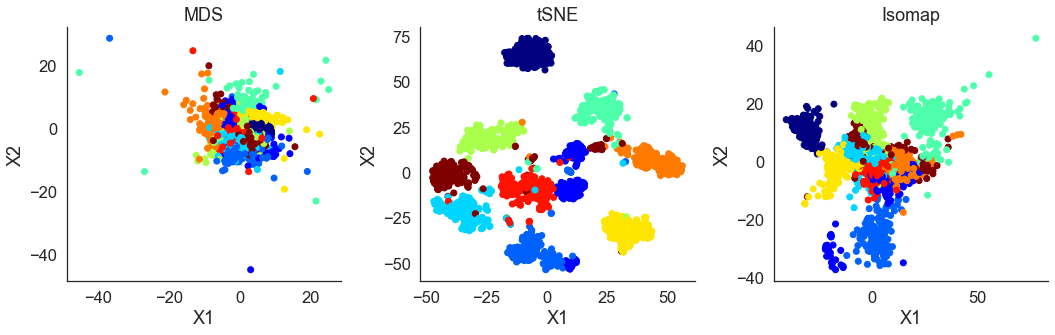

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(X_mds[:,0],X_mds[:,1],c=dataset.target)
plt.title('MDS')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(1,3,2)
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=dataset.target)
plt.title('tSNE')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(1,3,3)
plt.scatter(X_iso[:,0],X_iso[:,1],c=dataset.target)
plt.title('Isomap')
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()

As you can appreciate, the different methods can return quite different results. These will also change depending on the hyperparameters you are using. It is very important to be aware of the assumptions behind each technique, and remember that nonlinear dimensionality reduction tools are mostly useful for visualization: any conclusion drawn from this plot should be checked with appropriate quantitative measures and comparisons with null cases.

<div class="warning" style='padding:0.5em; background-color:#f1f1f1;border:1px solid black;width:95%'>

### Key points 

- PCA performs a linear transformation on the data space, such that the axis of the new basis are ordered by decreasing explained variance
- PCA can help to obtain a lower-dimensional description of high-dimensional, correlated data
- MDS,tSNE and Isomap are popular non-linear dimensionality reduction methods

<div class="warning" style='padding:0.5em; background-color:#f1f1f1;border:1px solid black;width:95%'>

### References and resources

**Books**
* [The elements of statistical learning](https://hastie.su.domains/ElemStatLearn/#:~:text=Elements%20of%20Statistical%20Learning%3A%20data%20mining%2C%20inference%2C%20and%20prediction.), chapter 14

**Web**
* [PCA wiki](https://en.wikipedia.org/wiki/Principal_component_analysis)
* [PCA, video lesson](https://www.youtube.com/watch?v=fkf4IBRSeEc&t=22s)


## Exercises
You can find the exercises for this lessons in [lesson1-exercises.ipynb](lesson1-exercises.ipynb)